# ML Trader

In [1]:
from utils.packages import *
from utils.variables import *
from utils.i_o import *
from utils.dir_slope import *
from utils.engine import *
from utils.loops import *
from utils.order import *
import winsound
from tqdm import tqdm
tqdm.pandas()

In [2]:
%%time
data = get_date_list(data)
data = run_engine(data)

 20%|█████▉                        | 379525/1911315 [00:25<02:15, 11340.89it/s]

pls    0.00481
dtype: float64
--------------------------------------
                  date ord_types               close_type      pls
2  2021-01-04 15:57:15     short  simple_slema_move_close  0.00067
3  2021-01-04 17:45:05     short  simple_slema_move_close  0.00002
4  2021-01-05 02:01:03      long  simple_slema_move_close  0.00025
5  2021-01-05 03:55:55      long  simple_slema_move_close  0.00046
6  2021-01-05 16:45:40     short                all_close -0.00406
7  2021-01-05 16:45:40      long                all_close  0.00418
8  2021-01-05 17:26:46      long  simple_slema_move_close  0.00001
9  2021-01-06 06:48:28     short                all_close -0.00365
10 2021-01-06 06:48:28      long                all_close  0.00376
11 2021-01-06 08:02:30      long  simple_slema_move_close  0.00019
12 2021-01-06 12:06:29      long  simple_slema_move_close  0.00002
13 2021-01-06 14:19:49     short  simple_slema_move_close  0.00177
14 2021-01-07 10:24:22     short                all_close  0

100%|██████████████████████████████| 1911315/1911315 [03:55<00:00, 8129.34it/s]

Wall time: 4min 14s


In [3]:
data['orders_list']

{'total_pl': -0.02876,
 1: {'open_order_type': 'short', 'bid': 1.22475, 'pl': 0.01244},
 2: {'open_order_type': 'long', 'ask': 1.22705, 'pl': -0.02956},
 3: {'open_order_type': 'short', 'bid': 1.22522, 'pl': 0.02582},
 4: {'open_order_type': 'long', 'ask': 1.22741, 'pl': -0.03028},
 5: {'open_order_type': 'short', 'bid': 1.22606, 'pl': 0.0275},
 6: {'open_order_type': 'long', 'ask': 1.22616, 'pl': -0.02778},
 7: {'open_order_type': 'short', 'bid': 1.22354, 'pl': 0.02246},
 8: {'open_order_type': 'long', 'ask': 1.22607, 'pl': -0.0276},
 9: {'open_order_type': 'short', 'bid': 1.22156, 'pl': 0.0185},
 10: {'open_order_type': 'long', 'ask': 1.2224, 'pl': -0.02026}}

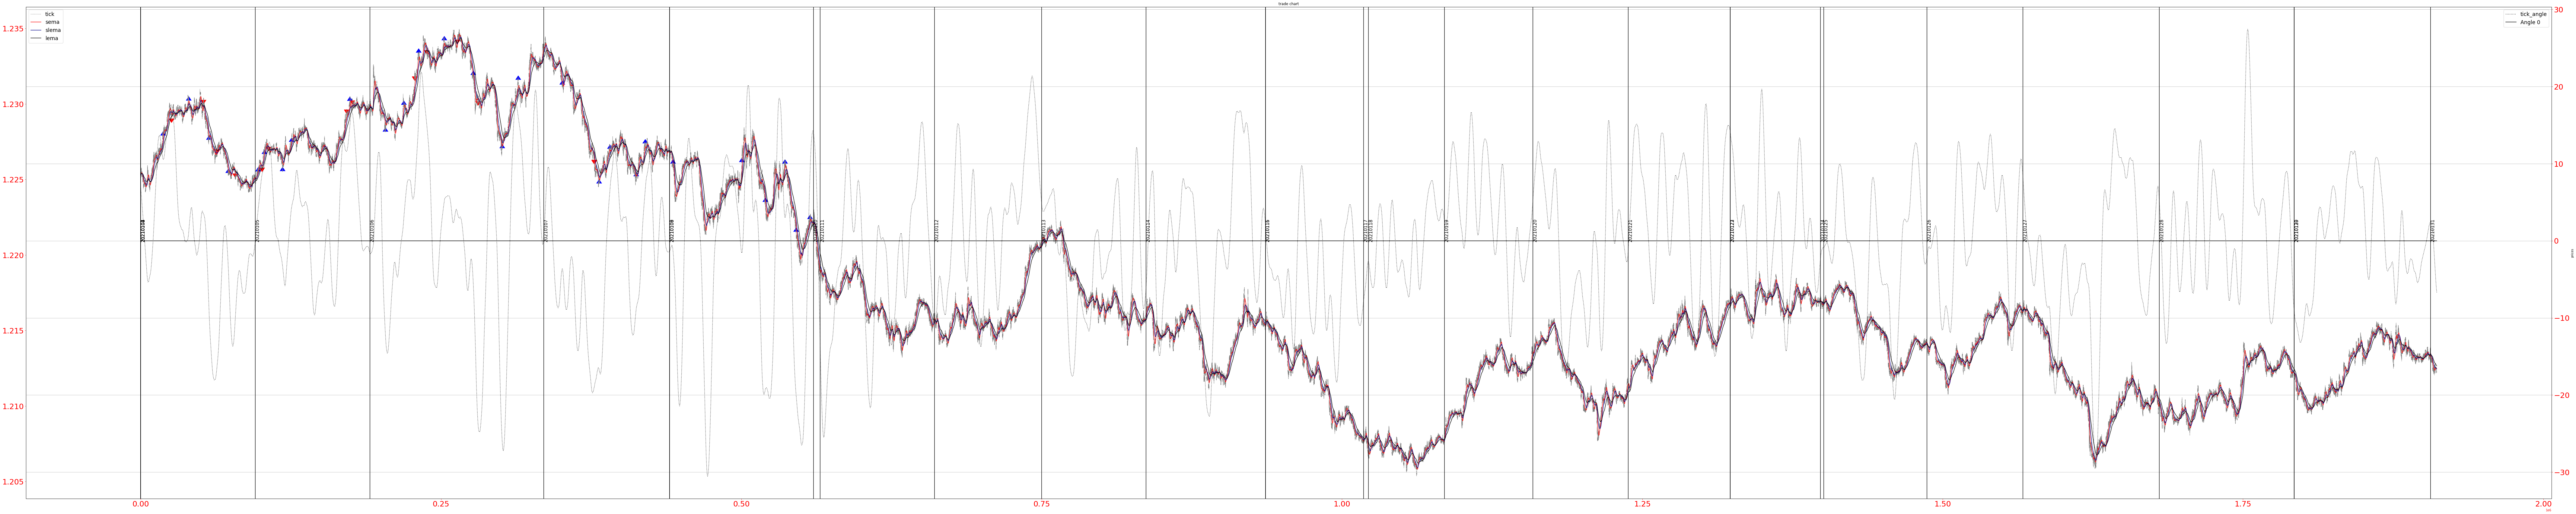

-----------------------------------------------------
date_val          : ['20210101', '20210102', '20210103', '20210104', '20210105', '20210106', '20210107', '20210108', '20210109', '20210110', '20210111', '20210112', '20210113', '20210114', '20210115', '20210116', '20210117', '20210118', '20210119', '20210120', '20210121', '20210122', '20210123', '20210124', '20210125', '20210126', '20210127', '20210128', '20210129', '20210130', '20210131']
Total PL : 0.004809999999999999
-------------
net_pl            : 0.00481/0.04163
-------------
+ve               : num= 14    sum= +0.02322    avg= +0.00166
-ve               : num= 3    sum= -0.01841    avg= -0.00614
-----------------------------------------------------
month_val
1    0.00481
Name: pls, dtype: float64
-----------------------------------------------------
simple_slema_move_close    10
all_close                   7
Name: close_type, dtype: int64
-----------------------------------------------------


In [4]:
if data["plot"]:
    data = adjust_plot_list_lengths(data)
    plot_graph(data)
    
print('-----------------------------------------------------')
print_report(data)
print('-----------------------------------------------------')
print(data['report_df'].groupby(['month_val'])['pls'].sum())
print('-----------------------------------------------------')
print(data['report_df']['close_type'].value_counts())
print('-----------------------------------------------------')
data['report_df']

winsound.PlaySound('C:\\Windows\\Media\\tada.wav', winsound.SND_ASYNC)

import glob

for file in glob.glob("data/*.csv"):
    if file not in ['data\\eurusd_2021.csv', 'data\\full_df.csv']:
        df = pd.read_csv(file)
        print('----------------------------')
        print(f'file : {file}')
        print(df['pls'].sum())
        print(df.groupby(['month_val'])['pls'].sum())
        print('----------------------------')

In [5]:
data['report_df'].groupby(['date_val'])['pls'].sum()

date_val
4    0.00177
5    0.00084
6    0.00209
7    0.00011
Name: pls, dtype: float64

In [6]:
winsound.PlaySound('C:\\Windows\\Media\\tada.wav', winsound.SND_ASYNC)
send_telegram_message(f'Run Complete')